## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    # add dropout at input layer
    dropped = Dropout(drp_ratio)(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.3, 0.4, 0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (drp))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "dropout-%s" % (drp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with Dropout = 0.200000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)     

Epoch 46/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.9727 - accuracy: 0.2698 - val_loss: 1.9010 - val_accuracy: 0.3113
Epoch 47/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.9653 - accuracy: 0.2660 - val_loss: 1.9040 - val_accuracy: 0.3130
Epoch 48/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.9659 - accuracy: 0.2630 - val_loss: 1.8779 - val_accuracy: 0.2905
Epoch 49/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.9469 - accuracy: 0.2749 - val_loss: 1.8437 - val_accuracy: 0.3164
Epoch 50/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.9515 - accuracy: 0.2717 - val_loss: 1.8446 - val_accuracy: 0.3119
Experiment with Dropout = 0.300000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         


Epoch 41/50
50000/50000 [==============================] - 17s 343us/step - loss: 2.1929 - accuracy: 0.1485 - val_loss: 2.1065 - val_accuracy: 0.1794
Epoch 42/50
50000/50000 [==============================] - 16s 313us/step - loss: 2.1867 - accuracy: 0.1445 - val_loss: 2.1256 - val_accuracy: 0.1842
Epoch 43/50
50000/50000 [==============================] - 15s 309us/step - loss: 2.1924 - accuracy: 0.1487 - val_loss: 2.1100 - val_accuracy: 0.1787
Epoch 44/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.1885 - accuracy: 0.1490 - val_loss: 2.1461 - val_accuracy: 0.1653
Epoch 45/50
50000/50000 [==============================] - 16s 310us/step - loss: 2.1905 - accuracy: 0.1511 - val_loss: 2.1432 - val_accuracy: 0.1781
Epoch 46/50
50000/50000 [==============================] - 15s 307us/step - loss: 2.1853 - accuracy: 0.1530 - val_loss: 2.1136 - val_accuracy: 0.1674
Epoch 47/50
50000/50000 [==============================] - 15s 306us/step - loss: 2.1895 - accuracy:

Epoch 36/50
50000/50000 [==============================] - 19s 372us/step - loss: 2.2869 - accuracy: 0.1073 - val_loss: 2.2962 - val_accuracy: 0.1040
Epoch 37/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.2671 - accuracy: 0.1195 - val_loss: 2.1936 - val_accuracy: 0.1654
Epoch 38/50
50000/50000 [==============================] - 19s 380us/step - loss: 2.2283 - accuracy: 0.1383 - val_loss: 2.1578 - val_accuracy: 0.1810
Epoch 39/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.2299 - accuracy: 0.1397 - val_loss: 2.2270 - val_accuracy: 0.1505
Epoch 40/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.2352 - accuracy: 0.1355 - val_loss: 2.2298 - val_accuracy: 0.1491
Epoch 41/50
50000/50000 [==============================] - 19s 380us/step - loss: 2.2292 - accuracy: 0.1395 - val_loss: 2.1971 - val_accuracy: 0.1663
Epoch 42/50
50000/50000 [==============================] - 19s 373us/step - loss: 2.2369 - accuracy:

Epoch 31/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.2955 - accuracy: 0.1021 - val_loss: 2.3010 - val_accuracy: 0.1025
Epoch 32/50
50000/50000 [==============================] - 20s 390us/step - loss: 2.2966 - accuracy: 0.1012 - val_loss: 2.2924 - val_accuracy: 0.1032
Epoch 33/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.2678 - accuracy: 0.1185 - val_loss: 2.2148 - val_accuracy: 0.1557
Epoch 34/50
50000/50000 [==============================] - 17s 341us/step - loss: 2.2422 - accuracy: 0.1323 - val_loss: 2.2238 - val_accuracy: 0.1755
Epoch 35/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.2481 - accuracy: 0.1292 - val_loss: 2.2126 - val_accuracy: 0.1605
Epoch 36/50
50000/50000 [==============================] - 18s 358us/step - loss: 2.2661 - accuracy: 0.1211 - val_loss: 2.2645 - val_accuracy: 0.1412
Epoch 37/50
50000/50000 [==============================] - 18s 368us/step - loss: 2.2632 - accuracy:

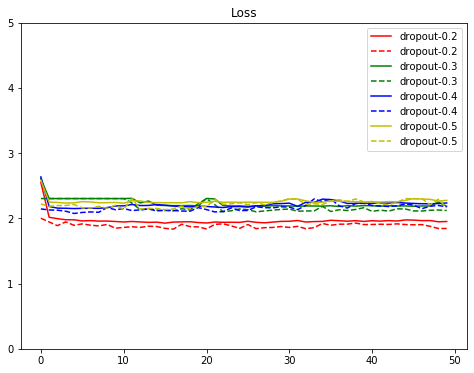

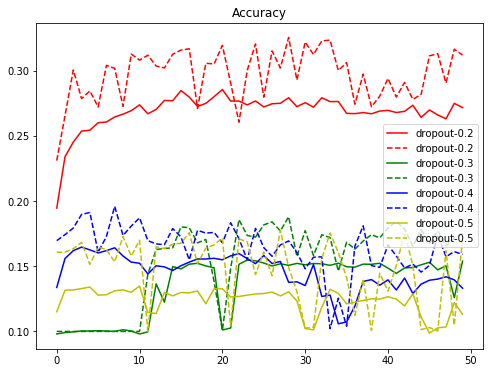

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()